# Year 2023 Day 17

[--- Day 17: Clumsy Crucible ---](https://adventofcode.com/2023/day/17)


In [454]:
import numpy as np
import pandas as pd
import xarray as xr
from graphviz import Digraph  # pyright: ignore[reportMissingTypeStubs]

from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.y_2023.problem_202317 import (
    AdventOfCodeProblem202317,
    dijkstra,
)

In [455]:
problem = AdventOfCodeProblem202317()
problem

AdventOfCodeProblem202317(year=2023, day=17)

In [456]:
example_inputs = get_example_inputs_file_contents(2023)["test_problem_202317"]
list(example_inputs.keys())

['EXAMPLE_INPUT', 'EXAMPLE_INPUT_PART_2']

In [457]:
def plot_input(puzzle_input: np.ndarray):
    xr.DataArray(example_input_part_1, dims=("rows", "cols")).plot(
        cmap="magma", yincrease=False
    )

## With Example Input


In [458]:
example_input_1 = problem.parse_text_input(example_inputs["EXAMPLE_INPUT"])

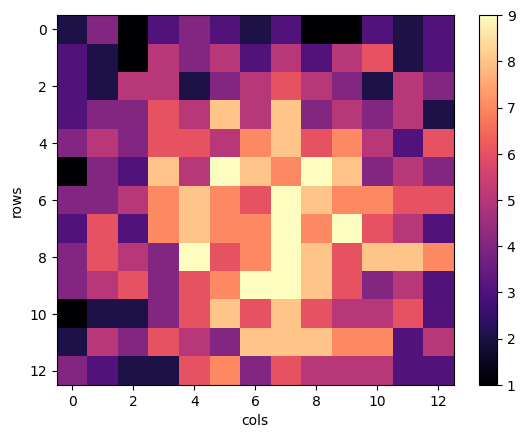

In [459]:
plot_input(example_input_1)

### Part 1


In [460]:
puzzle_input = example_input_1
start = (0, 0)
end_ = tuple((puzzle_input.shape[0] - 1, puzzle_input.shape[1] - 1))
end = (end_[0], end_[1])  # make type system happy

In [461]:
from advent_of_code.common.constants import Direction

from typing import get_args

directions_count = len(get_args(Direction))
directions_count

4

The Dijkstra algorithm used is an altered version where the directions must be taken into account, as well as the number of steps [1, 3] inclusive for Part 1, [4, 10] inclusive for Part 2.

Thus, the state space to explore is a 4D hypercube whose volume can be computed. 

Some of these states might be unreachable, depending on the starting position.

In [462]:
min_step = 1
max_step = 3
max_iter = 250_000

state_space_size = (
    puzzle_input.size * directions_count * len(range(min_step, max_step + 1))
)
state_space_size

2028

In [463]:
least_heat_loss, visited_states = dijkstra(
    puzzle_input, start, end, min_step, max_step, max_iter=max_iter
)
visited_count = len(visited_states.values())
print(
    f"{visited_count} states visited among {state_space_size} available ones ({visited_count/state_space_size:.0%})"
)

1637 states visited among 2028 available ones (81%)


To plot a 4D data cube, the 4 dimensions must be distributed to visual scales. A way to do so is by considering high-cardinality dimensions as raster-dimensions, and low-cardinality dimensions as facet-dimensions.

The raster-dimensions are natural: they are coming from the puzzle input raster. The `position` attribute of the `State` class contains a couple of coordinates. They will be the x and y dimensions.

The facet-dimensions are the two remaining ones: direction (cardinality of 4) and step count (between min_step and max_step, < 10 in this problem.)

First, the visited states data structure must be converted into an xarray DataArray (4D data cube). A pipeline can be : Python Data Structure -> Pandas DataFrame with MultiIndex -> xarray DataArray.

In [464]:
from advent_of_code.y_2023.problem_202317 import VisitedStates


def convert_states_to_dataarray(
    visited_states: VisitedStates, with_display: bool = True
) -> xr.DataArray:
    df = pd.DataFrame(
        [
            (
                vs.direction,
                vs.step,
                vs.position[0],
                vs.position[1],
                vs.heat,
            )
            for vs in visited_states.values()
        ],
        columns=["direction", "step", "x", "y", "heat"],
    ).set_index(["direction", "step", "x", "y"])

    if with_display:
        display(df)


    xda = df.to_xarray()["heat"]
    if with_display:
        display(xda)

    return xda


In [465]:
xda = convert_states_to_dataarray(visited_states)

heat
direction step x  y       
0         2    0  1      4
3         1    1  0      3
0         1    0  1      4
3         2    1  0      3
0         1    1  1      5
...                    ...
          3    8  12   109
               11 10   109
1         3    6  11   108
          2    8  10   110
2         2    11 6    110

[1637 rows x 1 columns]

<xarray.DataArray 'heat' (direction: 4, step: 3, x: 13, y: 13)>
array([[[[ nan,   4.,  10., ...,  41.,  48.,  50.],
         [ nan,   5.,   7., ...,  43.,  46.,  45.],
         [ nan,   8.,  12., ...,  43.,  50.,  51.],
         ...,
         [ nan,  46.,  48., ..., 105., 100.,  98.],
         [ nan,  54.,  55., ..., 106.,  nan, 101.],
         [ nan,  56.,  56., ...,  nan,  nan, 102.]],

        [[ nan,   4.,   5., ...,  38.,  43.,  51.],
         [ nan,  nan,   6., ...,  43.,  45.,  49.],
         [ nan,  nan,  13., ...,  43.,  48.,  54.],
         ...,
         [ nan,  nan,  48., ..., 105.,  nan, 103.],
         [ nan,  nan,  58., ..., 108.,  nan,  nan],
         [ nan,  nan,  58., ..., 106.,  nan,  nan]],

        [[ nan,  nan,   5., ...,  38.,  40.,  46.],
         [ nan,  nan,  nan, ...,  46.,  45.,  48.],
         [ nan,  nan,  nan, ...,  47.,  48.,  52.],
         ...,
...
         ...,
         [ 49.,  48.,  52., ...,  98.,  95.,  96.],
         [ 49.,  51.,  52., ..., 105.,  96., 103.],
         [ 57.,  57.,  57., ...,  nan, 104., 104.]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [  3.,  nan,  nan, ...,  nan,  nan,  nan],
         [  6.,   8.,  11., ...,  46.,  47.,  53.],
         ...,
         [ 47.,  46.,  51., ...,  97.,  99.,  93.],
         [ 51.,  53.,  56., ..., 105.,  98., 101.],
         [ 53.,  54.,  54., ...,  nan,  99.,  nan]],

        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [  6.,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [ 44.,  47.,  48., ...,  94.,  97.,  87.],
         [ 49.,  51.,  55., ..., 104., 102.,  98.],
         [ 55.,  56.,  58., ...,  nan, 101., 104.]]]])
Coordinates:
  * direction  (direction) int64 0 1 2 3
  * step       (step) int64 1 2 3
  * x          (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * y          (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12

Note about the Direction enum:

```python
EAST: EastType = 0
NORTH: NorthType = 1
WEST: WestType = 2
SOUTH: SouthType = 3
```

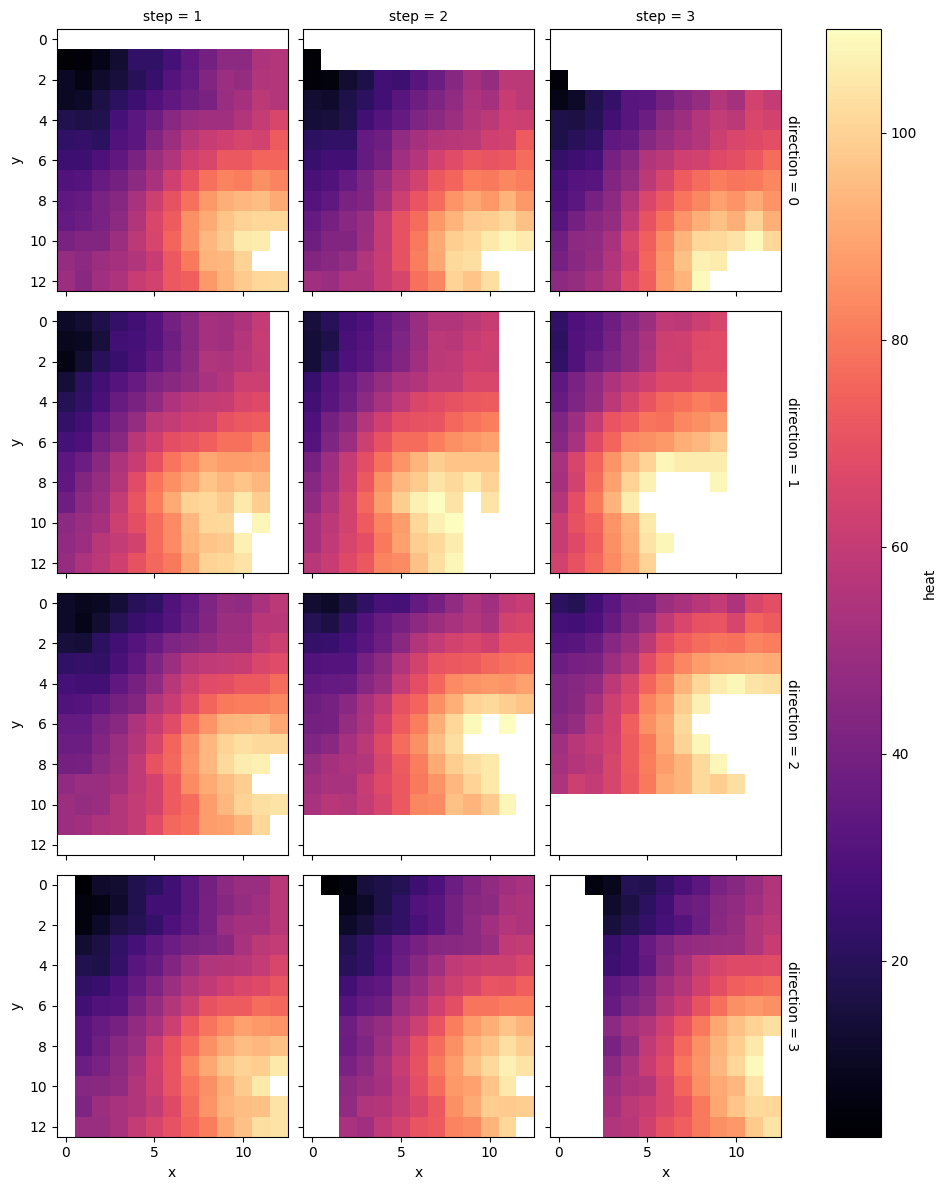

In [466]:
xda.plot(x="x", y="y", row="direction", col="step", yincrease=False, cmap="magma")

Nans are unexplored states.

However, even though this visual representation is the most natural one, it is not the friendliest. It is hard to understand what is going one, what path did the crucible take, etc.

Maybe there is other ways to visually encode the 'step' and 'direction' dimensions?

An idea can be taken from this reddit post: [[2023 Day 17 (Part 2)][Python] Terminal Visualization! ](https://www.reddit.com/r/adventofcode/comments/18kd5l0/2023_day_17_part_2python_terminal_visualization/). In this visualization, the cumulated heat component is ditched in favour of displaying the step count instead, making the economy of a dimension. The direction is shown with symbols: `><v^`.

It might be unavoidable to run the visualization _during_ algorithm execution, by instrumenting the Dijkstra's function code. Indeed, two ways of creating visualizations can be thought of:

- During execution: the algorithm is instrumented to output useful data for visualization. It is by nature invasive, as it adds a new concern into the code: in addition to solving the problem, helping the visualization is now a second task;
- After execution: the algorithm is not instrumented; its generated data, such as an history, is used to create the visualizations. 

I personally prefer the _After execution_ strategy, as it is less invasive. However the frontier is blurry, and there is a continuous spectrum. Indeed, the problem's solver can be written with visualization in mind from the start, hence the _After execution_ strategy will work auto-magically while it is in fact the _During execution_ strategy lurking into the code.



### Part 2


In [467]:
min_step = 4
max_step = 10
max_iter = 800_000

state_space_size = (
    puzzle_input.size * directions_count * len(range(min_step, max_step + 1))
)
state_space_size


4732

In [468]:
least_heat_loss, visited_states = dijkstra(
    puzzle_input, start, end, min_step, max_step, max_iter=max_iter
)
visited_count = len(visited_states.values())
print(
    f"{visited_count} states visited among {state_space_size} available ones ({visited_count/state_space_size:.0%})"
)

1848 states visited among 4732 available ones (39%)


In [469]:
xda = convert_states_to_dataarray(visited_states)

heat
direction step x  y       
0         2    0  1      4
3         2    1  0      3
          3    2  0      6
0         3    0  2      5
          4    0  3      8
...                    ...
          3    3  8     98
1         2    8  5    100
0         4    7  11    99
3         3    10 2     96
2         10   0  2     95

[1848 rows x 1 columns]

<xarray.DataArray 'heat' (direction: 4, step: 10, x: 13, y: 13)>
array([[[[nan, 63., 71., ..., 80., 80., 83.],
         [nan, 65., 80., ..., nan, 92., 96.],
         [nan, 75., 97., ..., nan, nan, nan],
         ...,
         [nan, 67., 87., ..., 89., nan, nan],
         [nan, 72., 94., ..., nan, nan, nan],
         [nan, 74., 95., ..., nan, nan, nan]],

        [[nan,  4., 64., ..., 72., 82., 83.],
         [nan, nan, 66., ..., 96., nan, 95.],
         [nan, nan, 80., ..., nan, nan, nan],
         ...,
         [nan, nan, 69., ..., 95., 95., nan],
         [nan, nan, 76., ..., nan, nan, nan],
         [nan, nan, 76., ..., nan, nan, nan]],

        [[nan, nan,  5., ..., 81., 74., 85.],
         [nan, nan, nan, ..., 99., nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [71., 93., 88., ..., nan, nan, 94.]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [89., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [89., nan, nan, ..., nan, nan, nan],
         [91., nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * direction  (direction) int64 0 1 2 3
  * step       (step) int64 1 2 3 4 5 6 7 8 9 10
  * x          (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * y          (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12

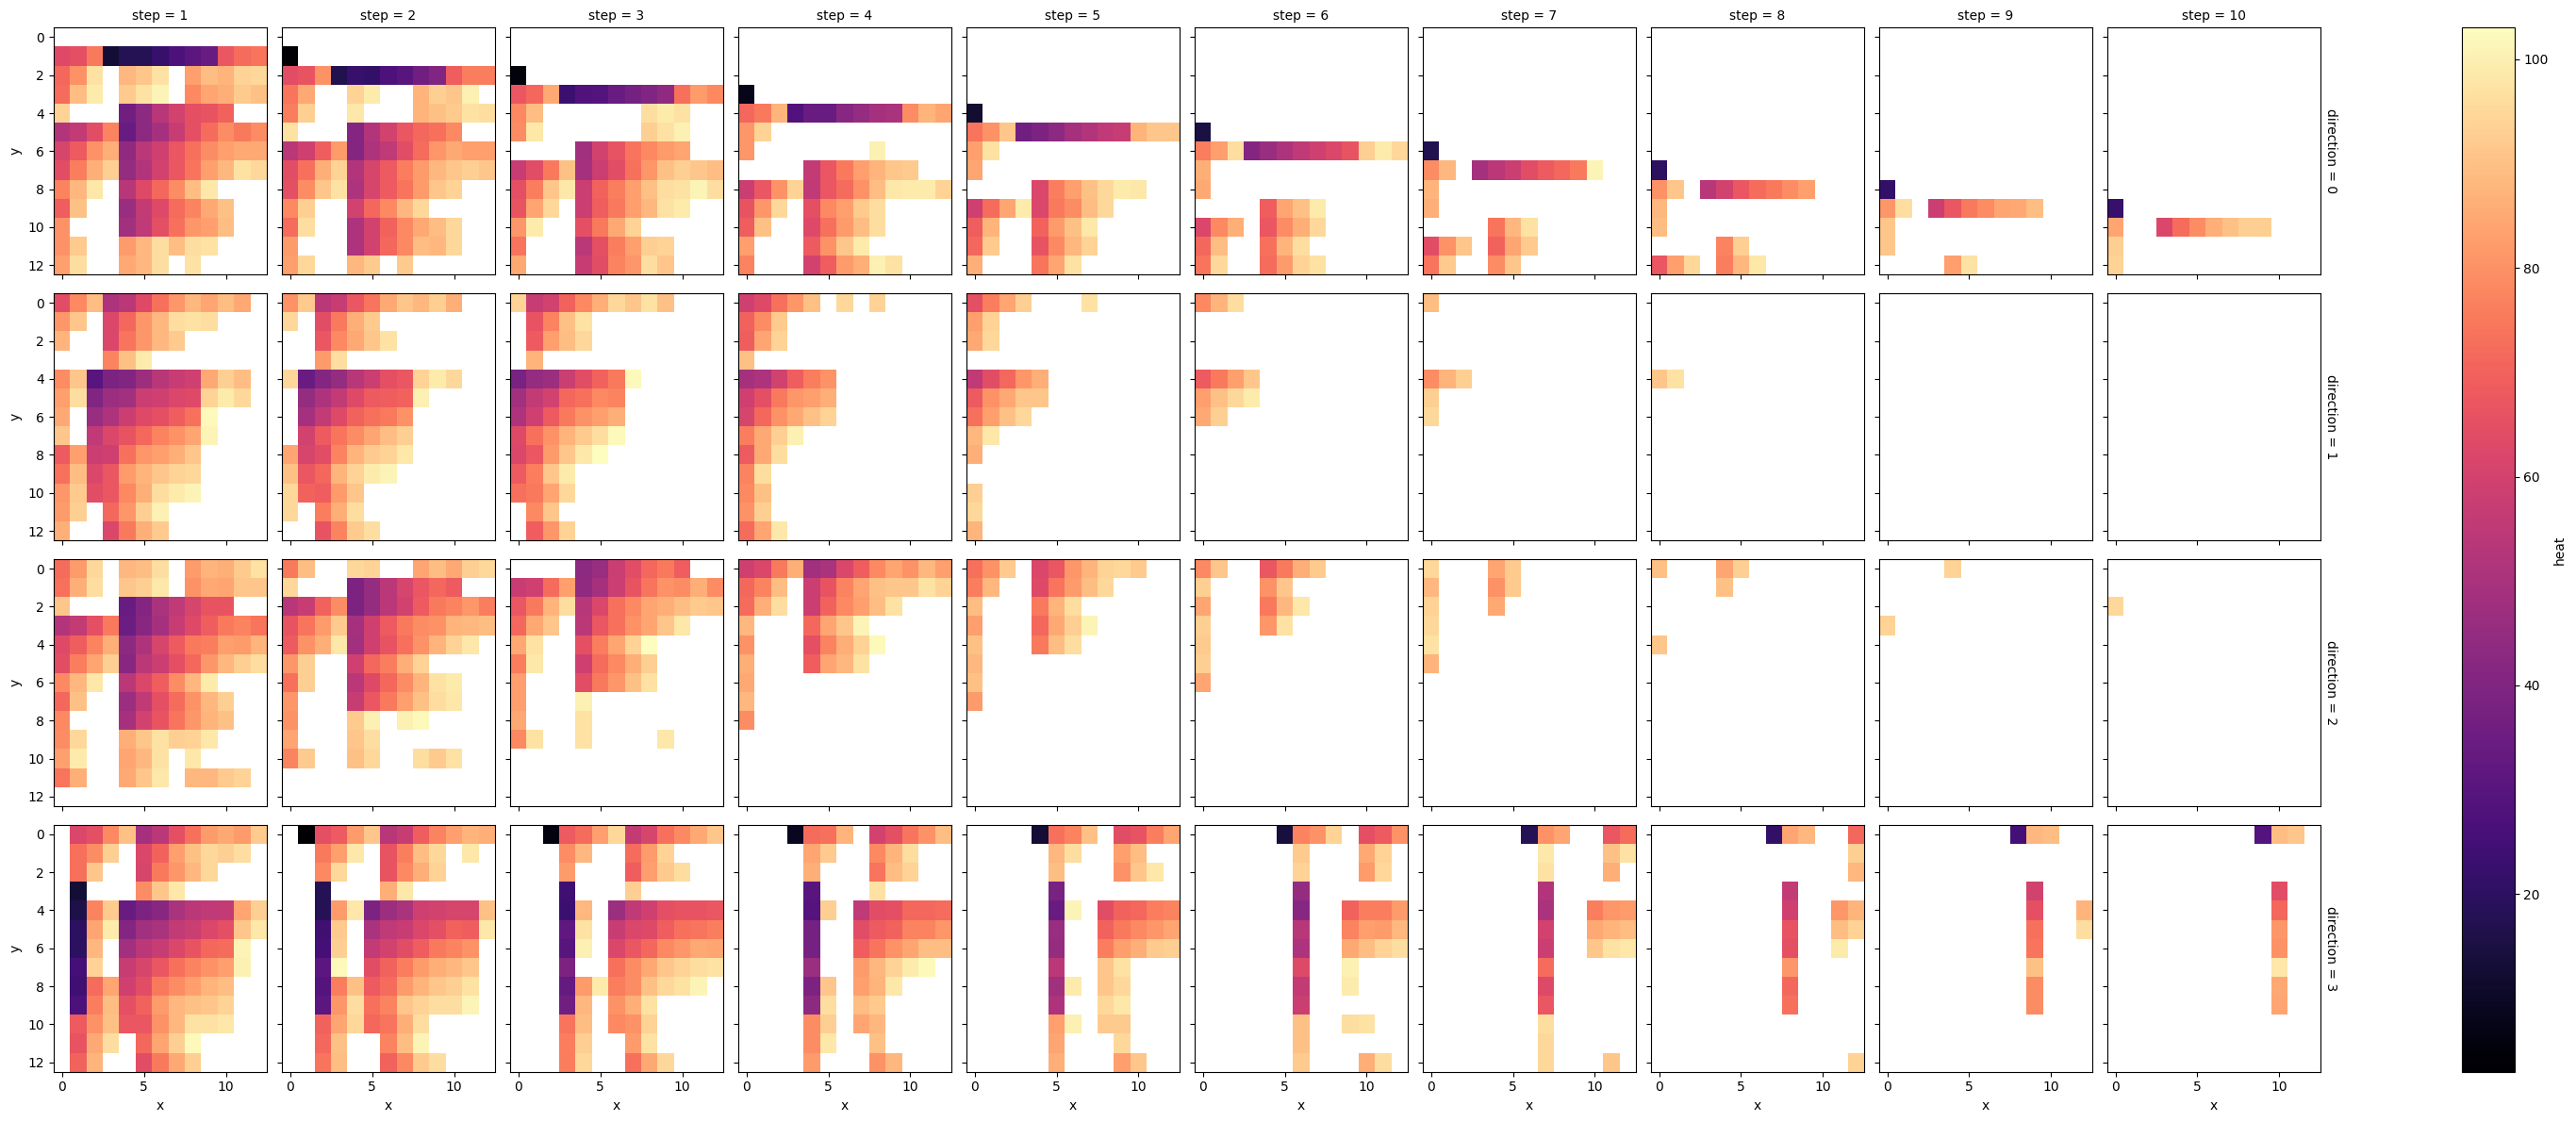

In [470]:
xda.plot(x="x", y="y", row="direction", col="step", yincrease=False, cmap="magma")

---------------